# week3 授業課題 信用情報の分析
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。 
https://www.kaggle.com/c/home-credit-default-risk                                                       
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。            
# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

* Home Creditはどのような企業？             
→銀行口座を持っていない人の返済能力を，電話会社の取引情報など代替データから予測している会社
* このコンペティションでは何を予測する？              
→住宅ローンの債務不履行になった人            
→目的変数名は「TARGET」で，「１」が債務不履行者                     
* それを予測することで企業が得られるメリットは何？                
→顧客を審査するときの基準になる

### データセットの準備
データセットはコンペティションのDataページから**application_train.csv**をダウンロードして使用します。Dataページ内の他のcsvファイルはこの課題では扱いません。

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)#すべてのカラムを表示
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#データの読み込み
df = pd.read_csv('C:/Users/miyas/kaggle/application_train.csv')

### カーネルについて
コンペティションのKernelページで公開されているカーネルを活用してください。

**＜推奨参考カーネル＞**      
Home Credit Default Risk Extensive EDA |https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda          
HomeCreditRisk: Extensive EDA + Baseline [0.772] |https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772    
HomeCreditRisk : Extensive EDA + Baseline Model JP |https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp  
この他タイトルにEDAと付いているものを参考にしてください。
# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

* .head()、.info()、describe()などを使う
* 欠損値の有無を見る
* クラスごとのデータ数をグラフに出す
それぞれ結果に対する説明や考察も行ってください。

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

* 予測したいターゲットは２列目で，０か１の２値．
* 120特徴量，欠損値（NAN）あり，object型の変数あり．

In [4]:
#include='all'とすることで，object型も含めた者が見れる
df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

* サンプル数は307511
* DAYS_EMPLOYEDは，minとmaxの差が激しい（-～+までの値）
* FLAGとついている特徴量は0・1の2値

In [5]:
# 欠損割合の確認
null_df = pd.DataFrame((df.isnull().sum() /len(df)).sort_values(ascending=False))
null_df.head(10)

,0
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_MODE,0.683550
LIVINGAPARTMENTS_AVG,0.683550


In [6]:
null_df[11:21]

,0
FLOORSMIN_MODE,0.678486
FLOORSMIN_AVG,0.678486
YEARS_BUILD_MEDI,0.664978
YEARS_BUILD_AVG,0.664978
YEARS_BUILD_MODE,0.664978
OWN_CAR_AGE,0.659908
LANDAREA_MODE,0.593767
LANDAREA_AVG,0.593767
LANDAREA_MEDI,0.593767
BASEMENTAREA_MEDI,0.585160


In [7]:
null_df[21:31]

,0
BASEMENTAREA_AVG,0.585160
BASEMENTAREA_MODE,0.585160
EXT_SOURCE_1,0.563811
NONLIVINGAREA_MEDI,0.551792
NONLIVINGAREA_AVG,0.551792
NONLIVINGAREA_MODE,0.551792
ELEVATORS_MODE,0.532960
ELEVATORS_AVG,0.532960
ELEVATORS_MEDI,0.532960
WALLSMATERIAL_MODE,0.508408


In [8]:
null_df[31:41]

,0
APARTMENTS_MODE,0.507497
APARTMENTS_AVG,0.507497
APARTMENTS_MEDI,0.507497
ENTRANCES_MEDI,0.503488
ENTRANCES_MODE,0.503488
ENTRANCES_AVG,0.503488
LIVINGAREA_MEDI,0.501933
LIVINGAREA_MODE,0.501933
LIVINGAREA_AVG,0.501933
HOUSETYPE_MODE,0.501761


In [9]:
null_df[41:51]

,0
FLOORSMAX_MODE,0.497608
FLOORSMAX_MEDI,0.497608
FLOORSMAX_AVG,0.497608
YEARS_BEGINEXPLUATATION_MEDI,0.487810
YEARS_BEGINEXPLUATATION_AVG,0.487810
YEARS_BEGINEXPLUATATION_MODE,0.487810
TOTALAREA_MODE,0.482685
EMERGENCYSTATE_MODE,0.473983
OCCUPATION_TYPE,0.313455
EXT_SOURCE_3,0.198253


* 同じ割合で欠損している特徴量は，何か理由がありそう
* ５割以上欠損している特徴量が３割．．欠損値も特徴量として使う必要がありそう．

In [10]:
# データ型の確認
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
df.TARGET.unique()

array([1, 0], dtype=int64)

Text(0.5, 0, 'sample_num')

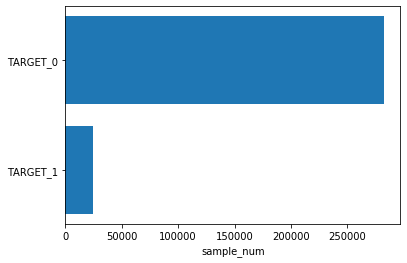

In [13]:
# 目的変数の分布
x = df.TARGET.unique()
y = df.TARGET.value_counts()

plt.barh(x,y,align='center')
plt.yticks(x,['TARGET_0','TARGET_1'])
plt.xlabel('sample_num')

債務不履行者が圧倒的に少ない不均衡データ

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。                
* 欠損値が多いので，削るにしても，どの特徴量が重要なのかを知る必要がある
* object型は数値型にしたいが，ユニーク値が何個あるかでどう変換するかが変わってくる

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

## オブジェクト型

In [14]:
# カテゴリ変数名を取得する関数
def get_categorical_features(df):
    obj_feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return obj_feats

In [15]:
obj_feats = get_categorical_features(df)

In [16]:
df[obj_feats].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

２値のものはダミー変数化．                  
それ以上のものは，数字の大きさに意味を持たせたくないので，OneHotエンコーディングするのが良さそう           
NAME_EDUCATION_TYPEはダミー変数化でもいい気もする．

In [17]:
# データオブジェクト型のみ
df_ob = df[df.columns[df.dtypes == 'object']]
df_ob = pd.concat([df_ob,df.TARGET],axis=1)
df_ob

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No,0
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No,0
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No,0
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No,1


In [18]:
# ターゲット変数ごとに分ける
df_ob0 = df_ob[df_ob.TARGET == 0]
df_ob1 = df_ob[df_ob.TARGET == 1]
df_ob0.shape,df_ob1.shape

((282686, 17), (24825, 17))

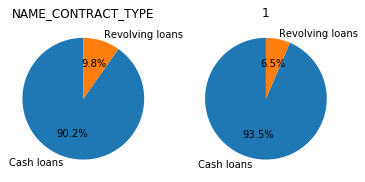

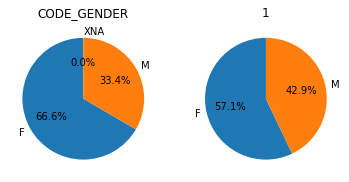

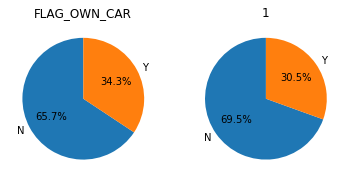

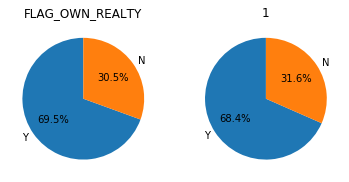

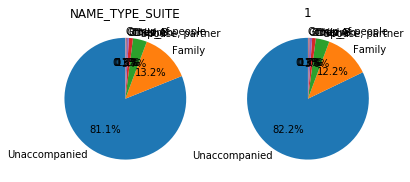

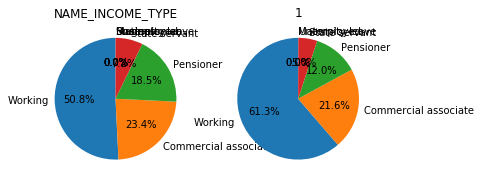

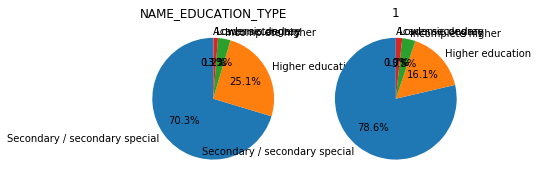

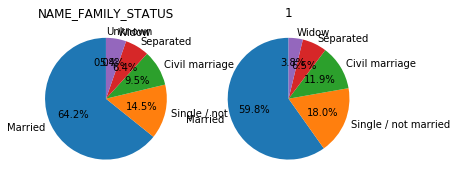

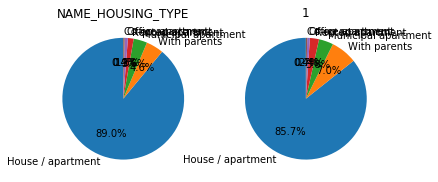

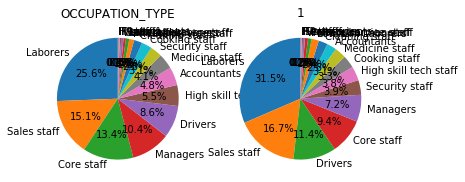

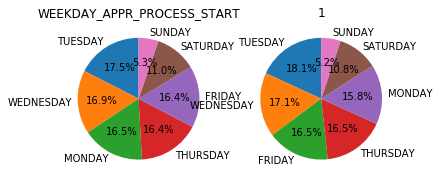

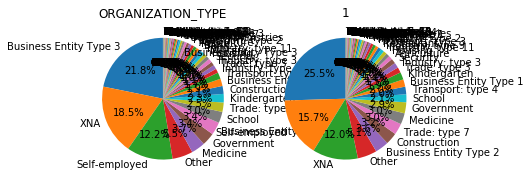

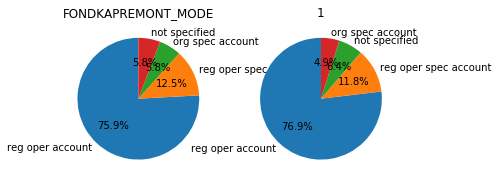

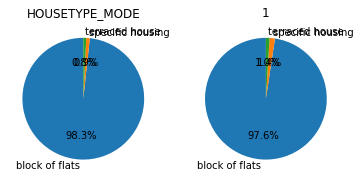

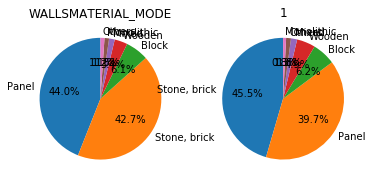

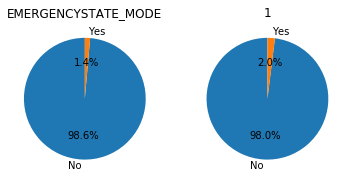

In [19]:
# 円グラフで可視化
for i in range(len(obj_feats)):
    x = df_ob0.iloc[:,i].value_counts() # i番目の特徴量のTARGET_0の人数
    y = df_ob1.iloc[:,i].value_counts() # i番目の特徴量のTARGET_1の人数
    
    fig,ax = plt.subplots(1,2) # 並べて表示するために
    
    ax[0].pie(x,autopct="%1.1f%%",labels=x.index,startangle=90) # ax[0]にTARGET_0の人の円グラフを表示
    ax[0].set_title(obj_feats[i])
    ax[1].pie(y,autopct="%1.1f%%",labels=y.index,startangle=90)# ax[1]にTARGET_1の人の円グラフを表示
    ax[1].set_title('1')
    plt.show()

* 債務不履行者は男性に多い           
* 債務不履行者は，そうでない人より，若干だが車の所有率が低い
* 学歴や働き方に差がある

## データ型ごとに特徴量の分布を見る
### float型特徴量の分布

In [20]:
# float型のみのdfを作成
df_fl = df[df.columns[df.dtypes == 'float64']]
df_fl = pd.concat([df_fl,df.TARGET],axis=1) # ターゲット変数も列に追加
# ターゲット変数ごとに分ける。
df_fl0 = df_fl[df_fl.TARGET == 0]
df_fl1 = df_fl[df_fl.TARGET == 1]
df_fl0.shape,df_fl.shape

((282686, 66), (307511, 66))

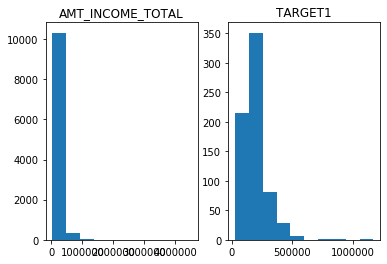

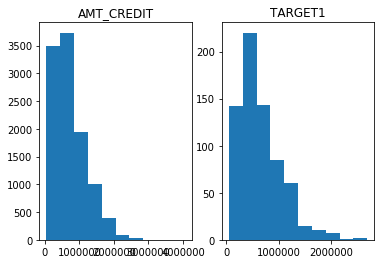

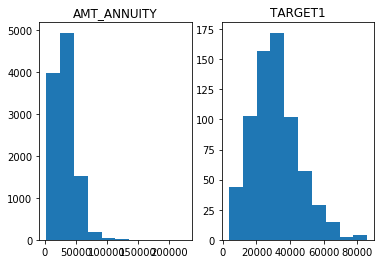

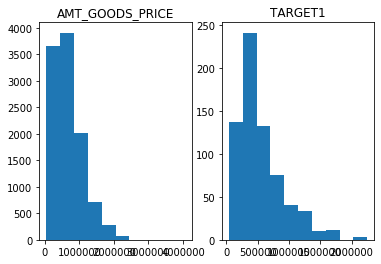

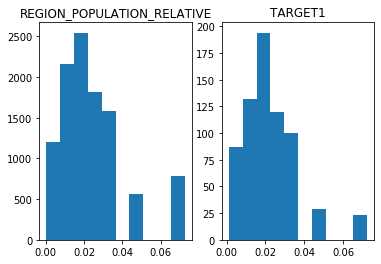

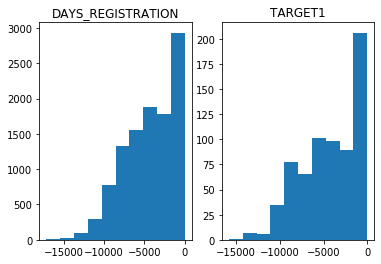

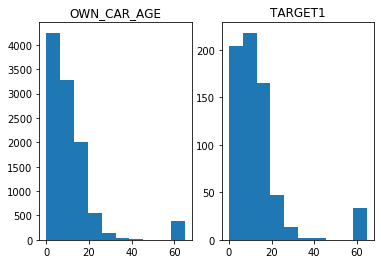

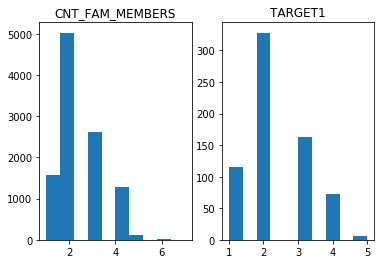

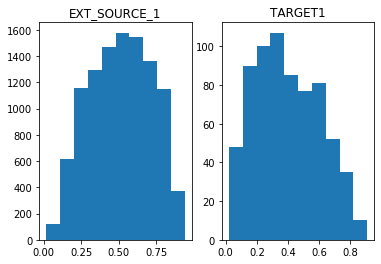

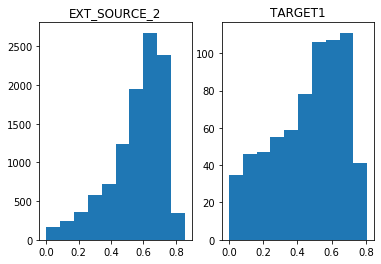

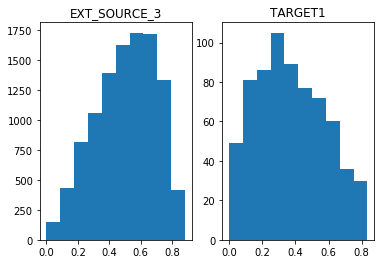

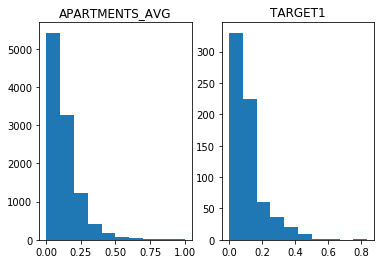

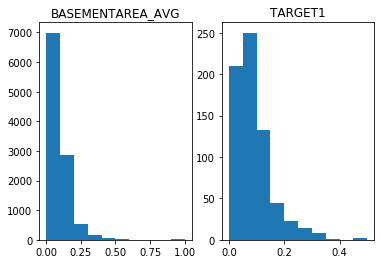

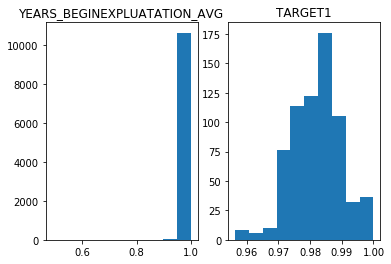

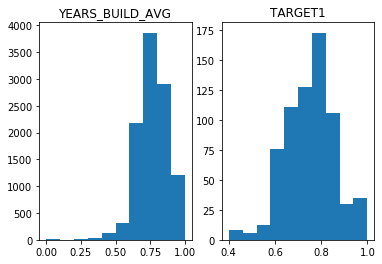

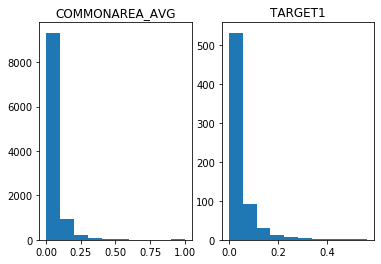

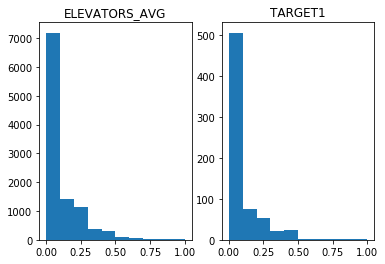

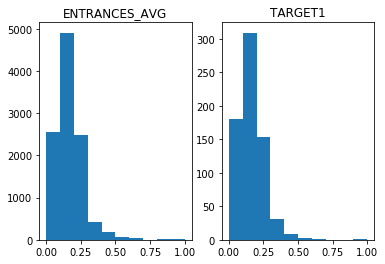

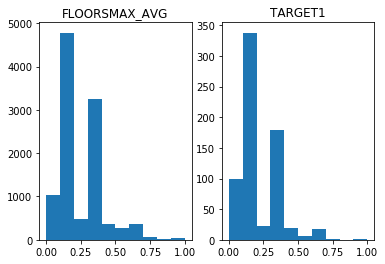

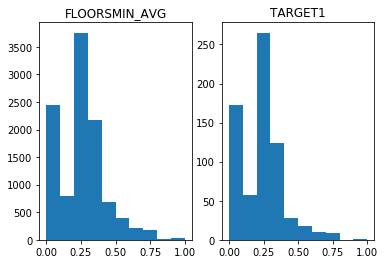

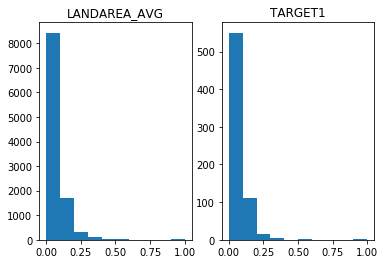

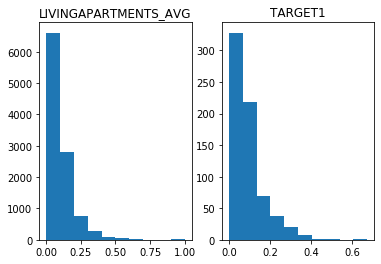

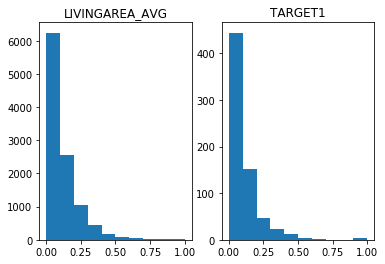

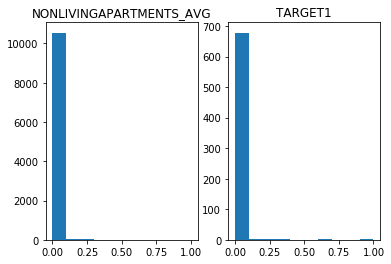

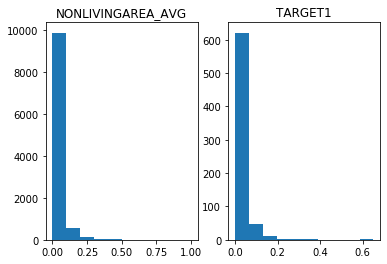

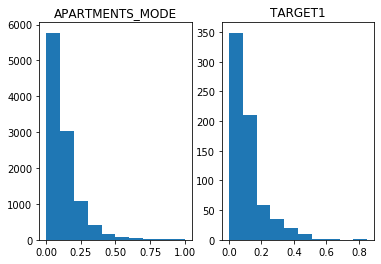

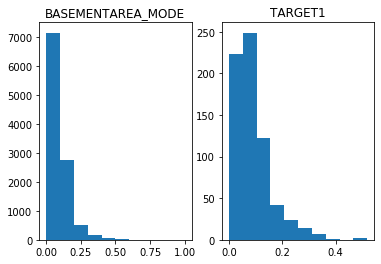

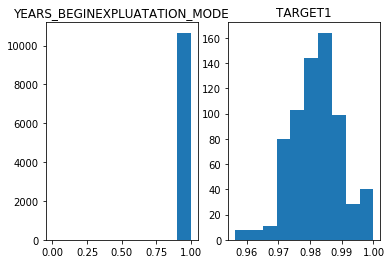

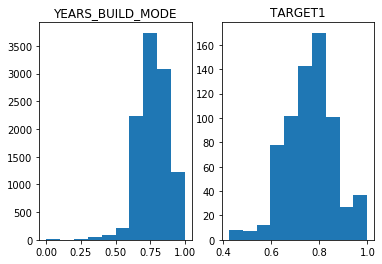

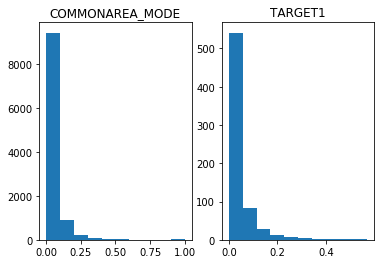

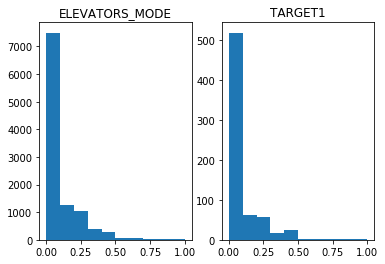

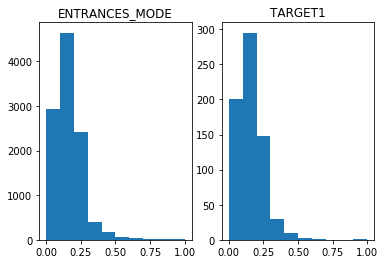

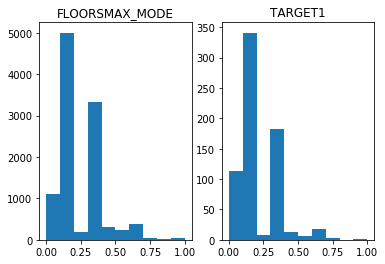

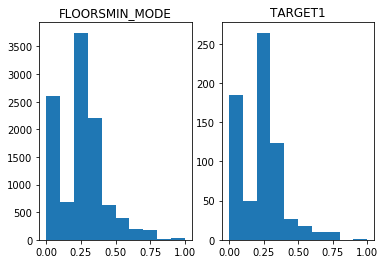

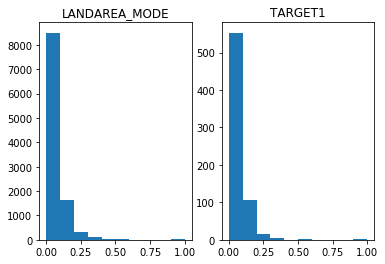

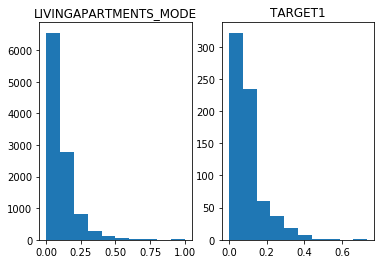

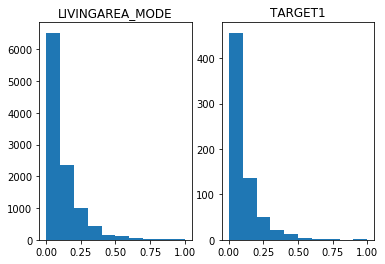

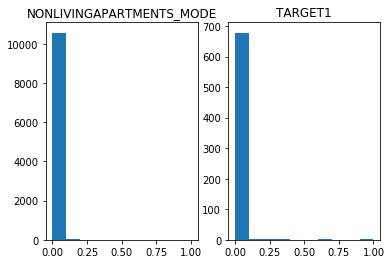

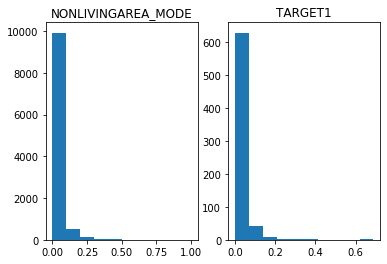

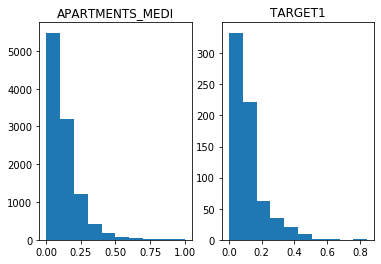

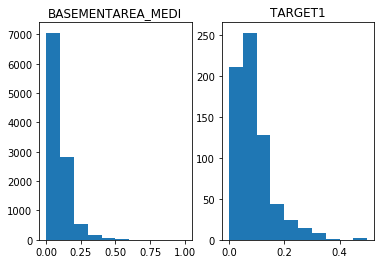

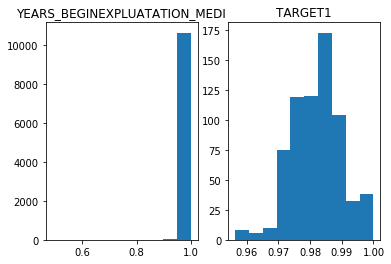

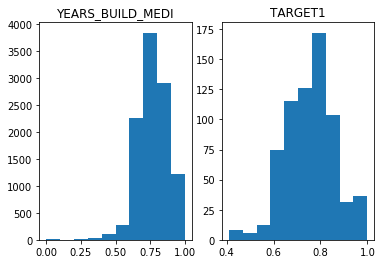

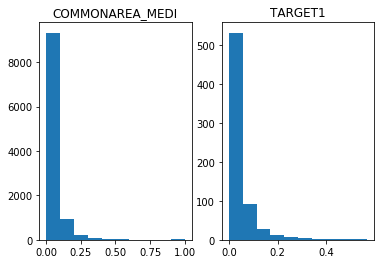

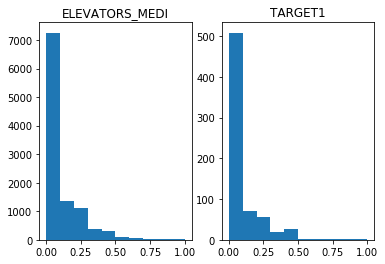

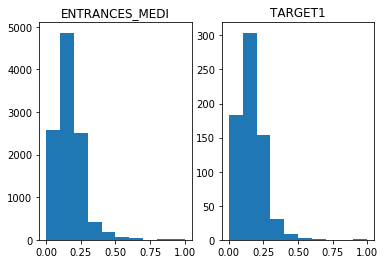

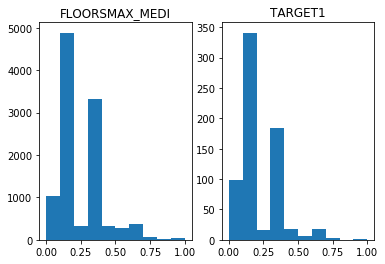

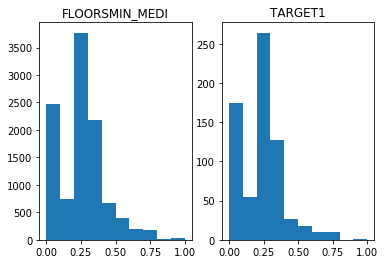

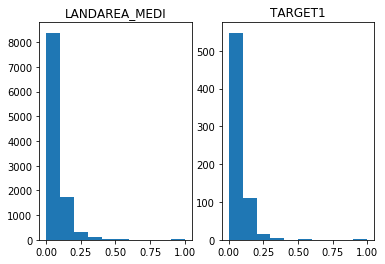

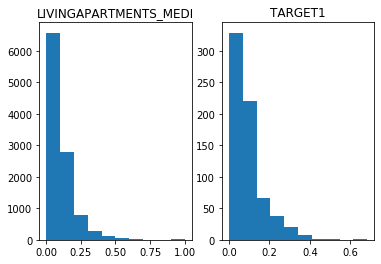

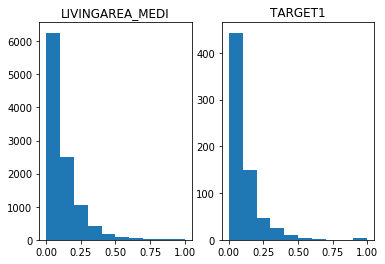

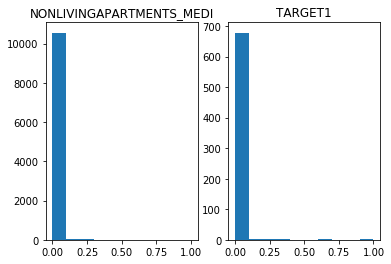

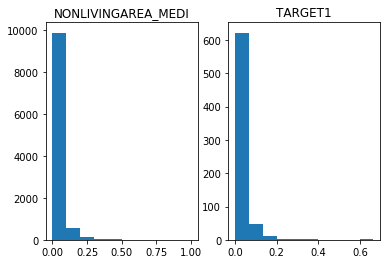

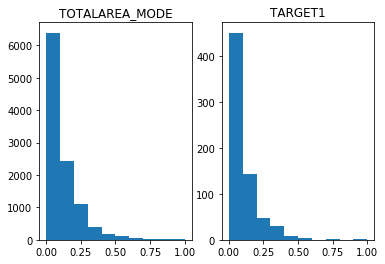

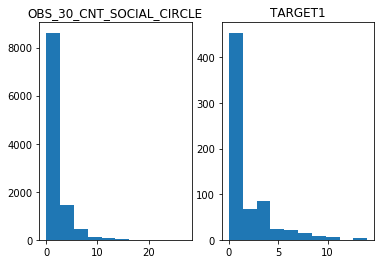

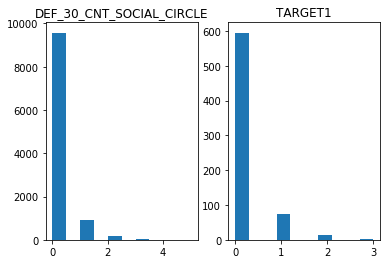

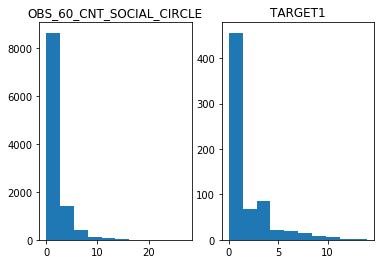

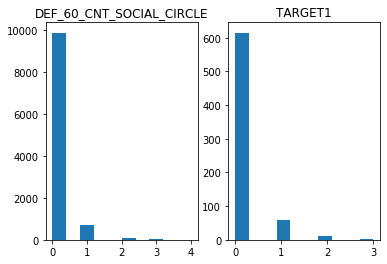

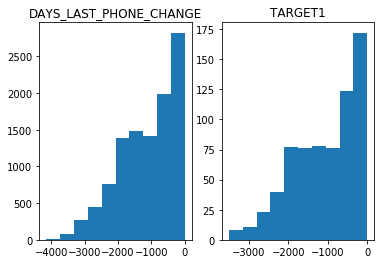

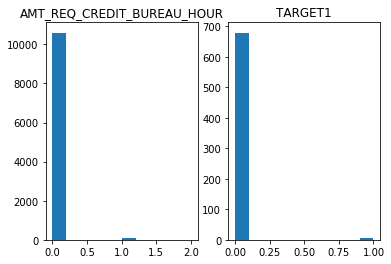

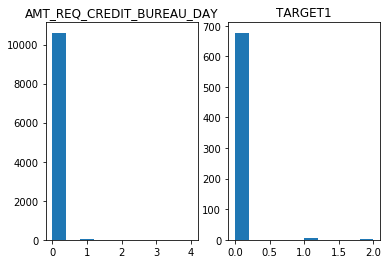

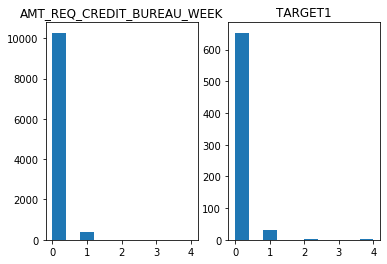

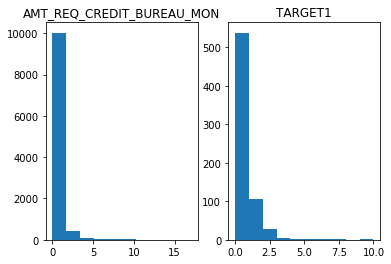

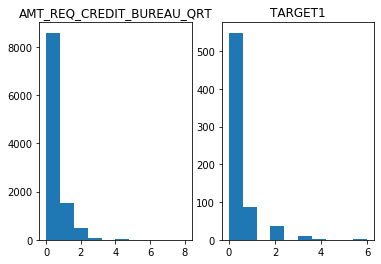

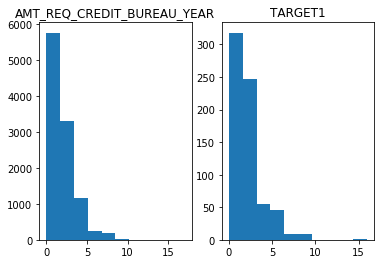

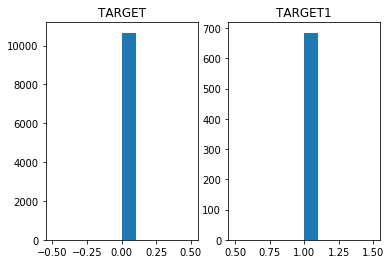

In [21]:
# ターゲット変数別にヒストグラムを出力し，分布の違いを見る
for i in range(len(df_fl.columns)):
    fig,ax = plt.subplots(1,2)
    ax[0].hist(df_fl0.dropna().iloc[:,i]) #欠損値は全て取り除く
    ax[0].set_title(df_fl.columns[i])
    
    ax[1].hist(df_fl1.dropna().iloc[:,i])
    ax[1].set_title('TARGET1')
    plt.show()

* AMT_INCOME_TOTAL
* AMT_ANNUITY
* EXT_SOURCE_3
* YEARS_BEGINEXPLUATATION_AVG
* YEARS_BEGINEXPLUATATION_MODE
* YEARS_BEGINEXPLUATATION_MEDI
* YEARS_BUILD_MEDI               
                 
上記あたりがかなり分布に差があるので，重要そう．                 
欠損値を削除せずに見てみる

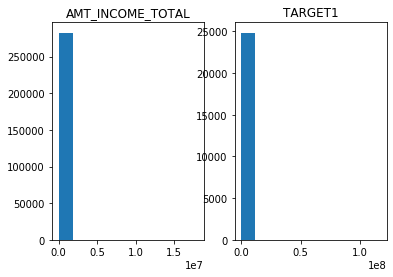

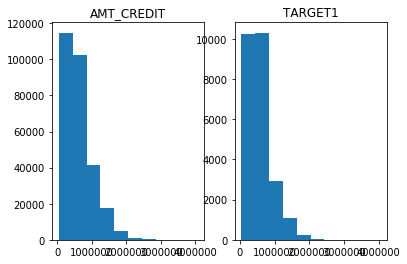

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


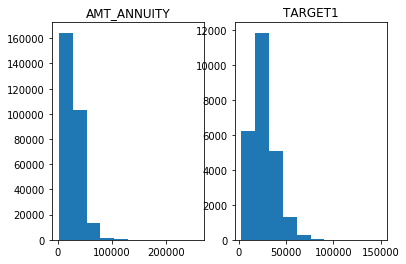

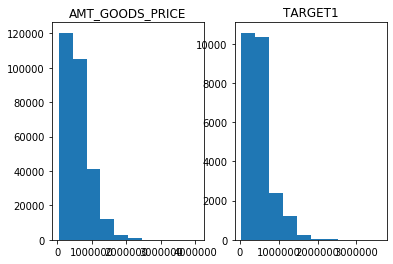

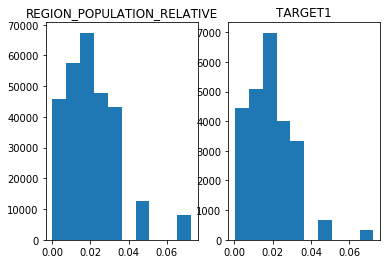

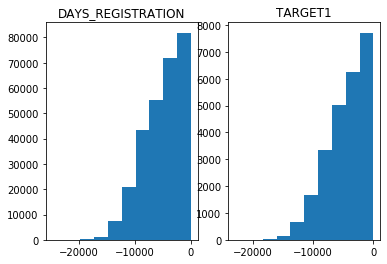

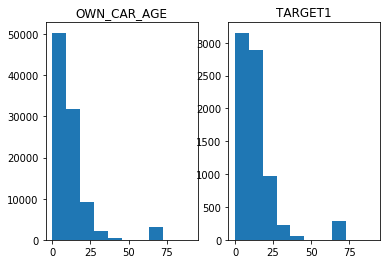

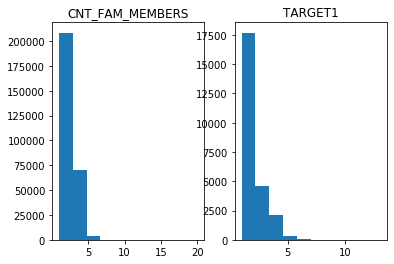

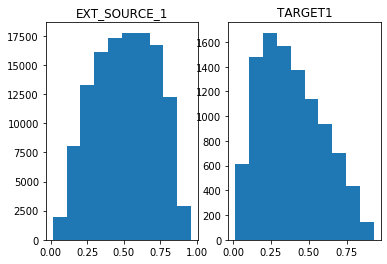

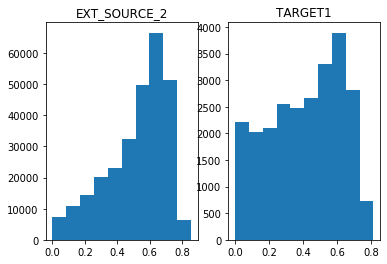

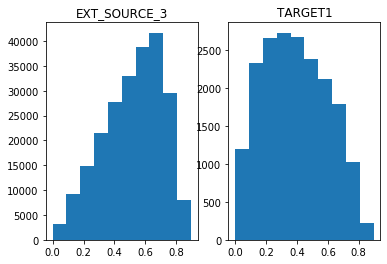

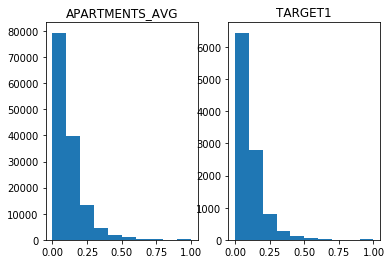

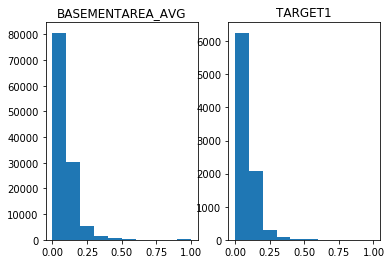

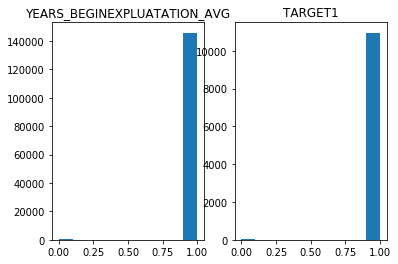

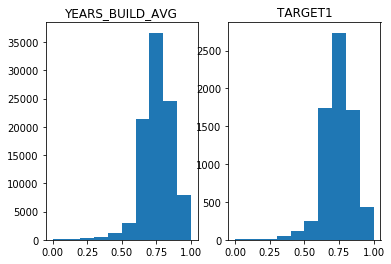

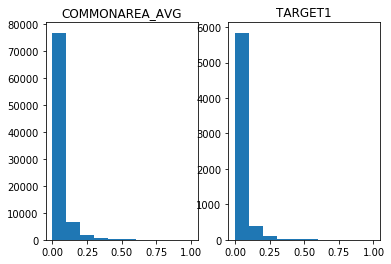

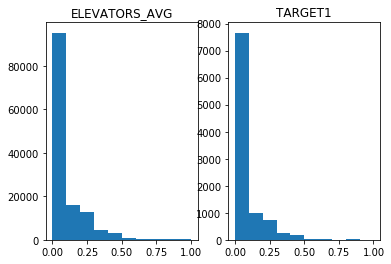

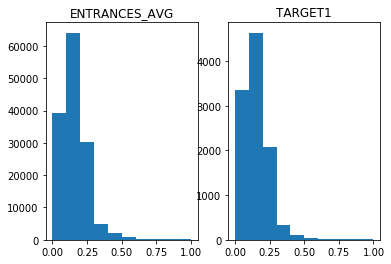

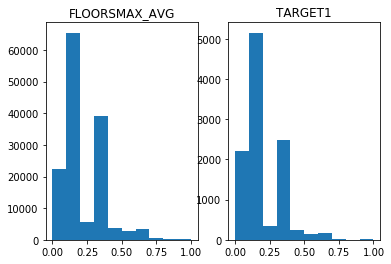

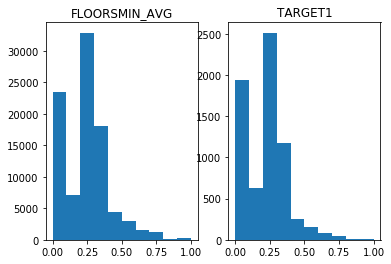

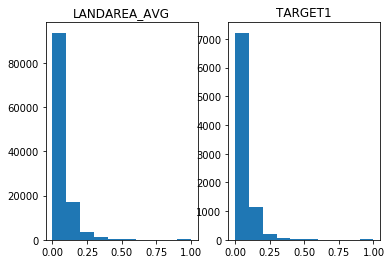

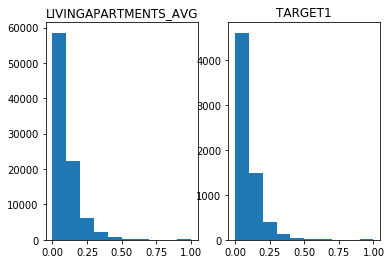

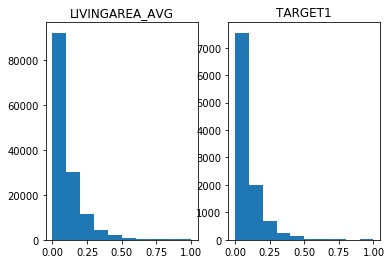

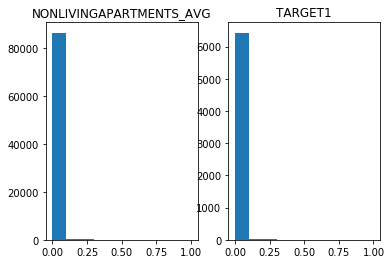

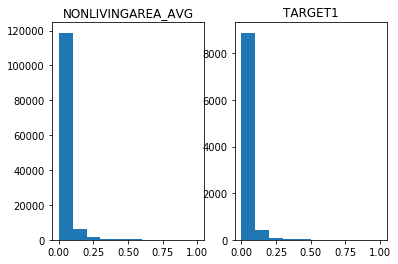

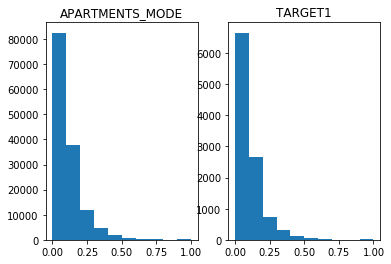

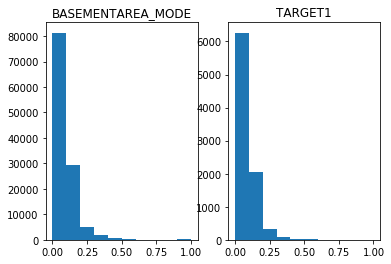

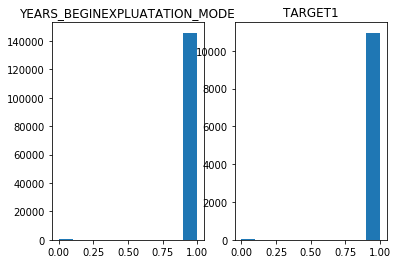

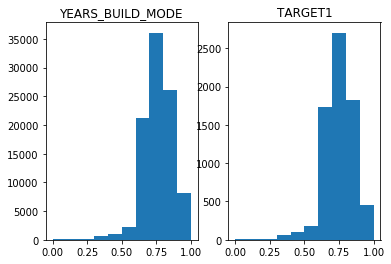

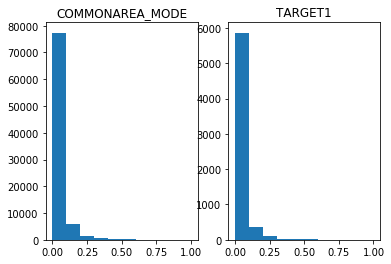

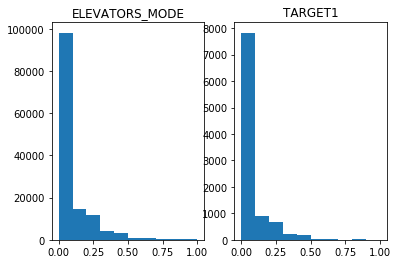

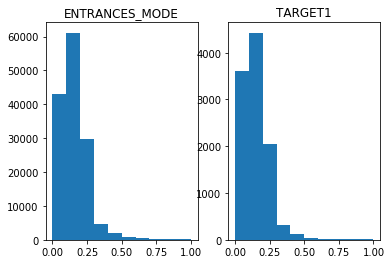

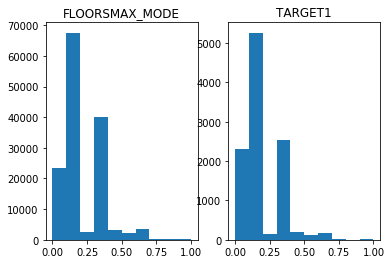

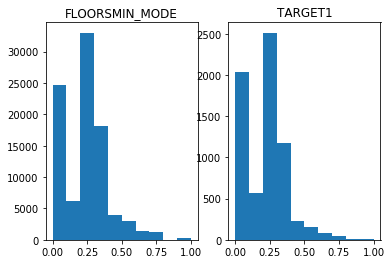

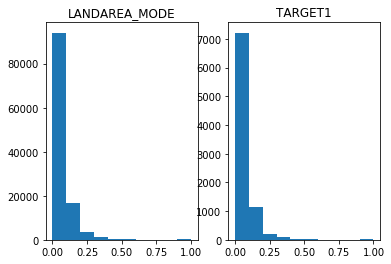

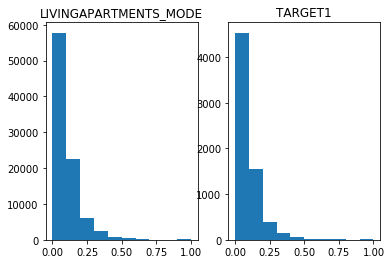

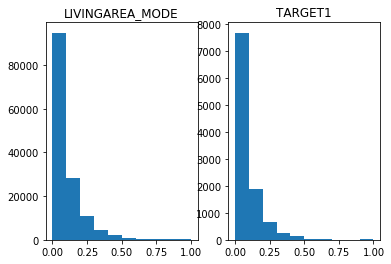

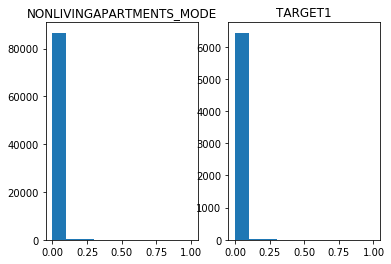

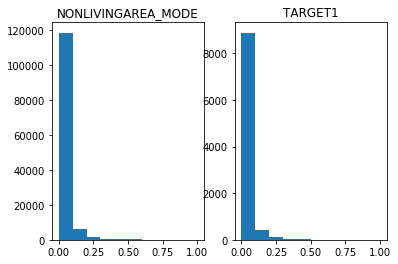

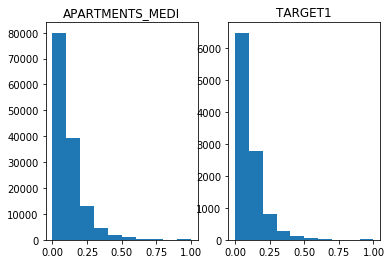

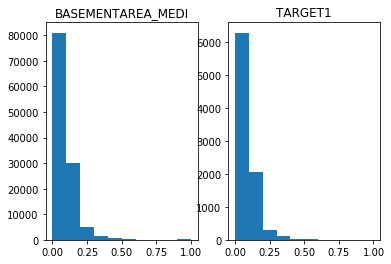

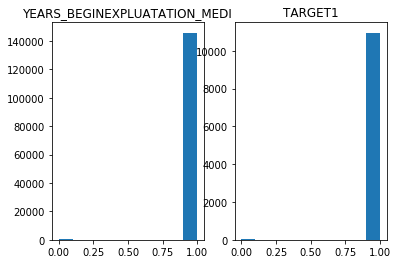

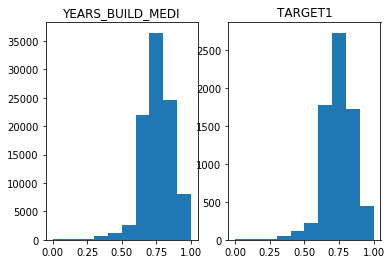

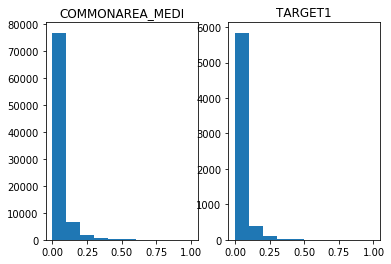

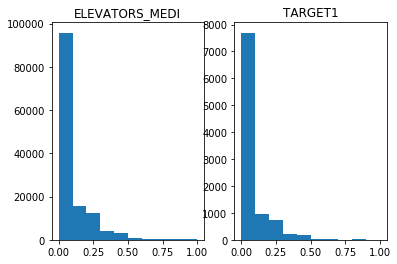

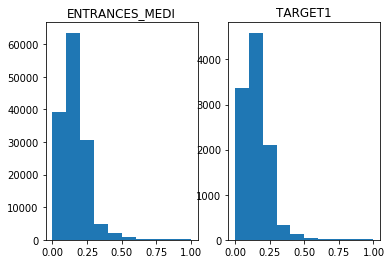

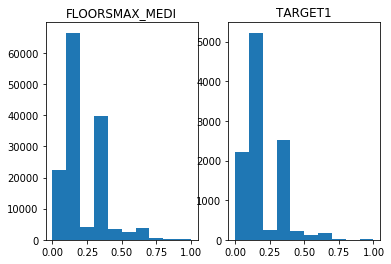

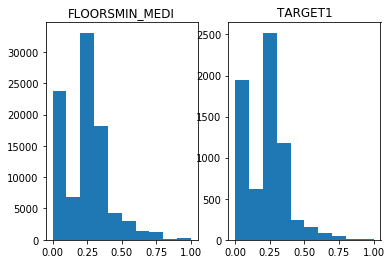

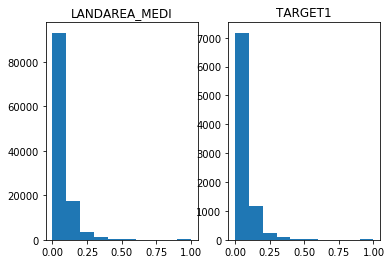

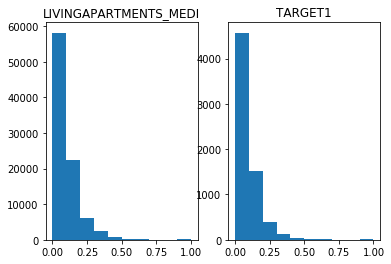

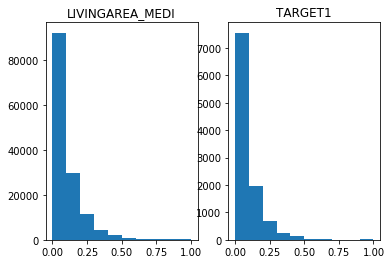

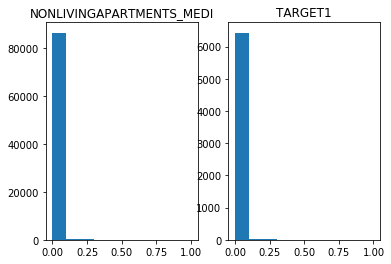

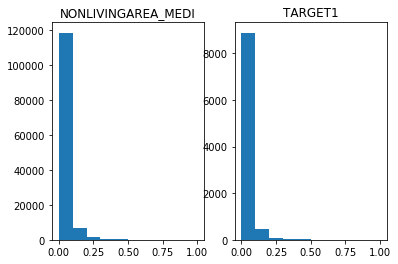

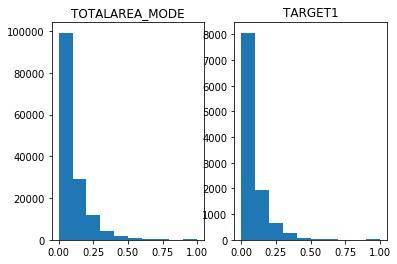

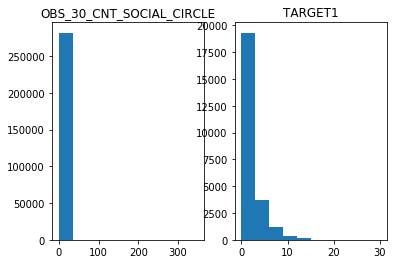

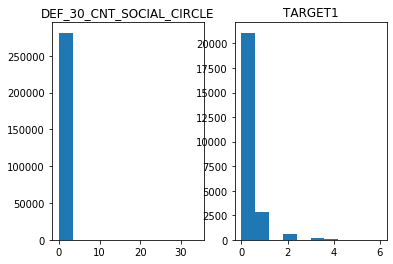

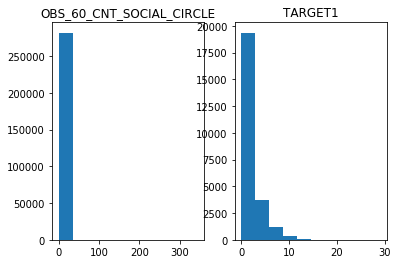

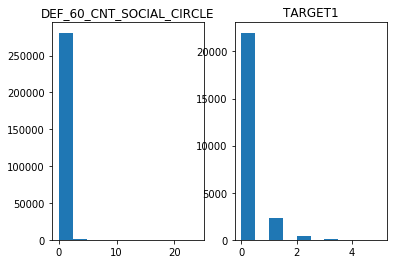

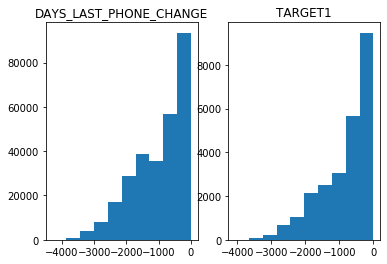

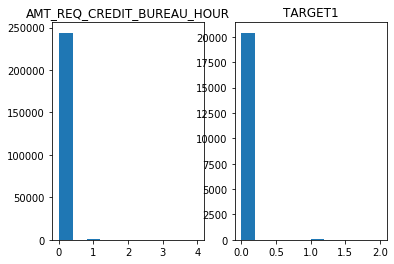

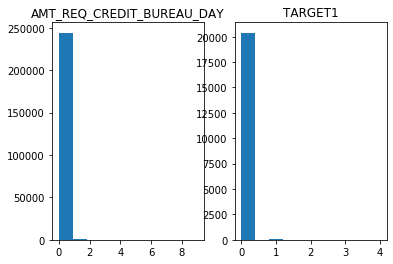

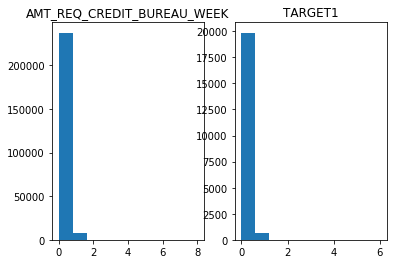

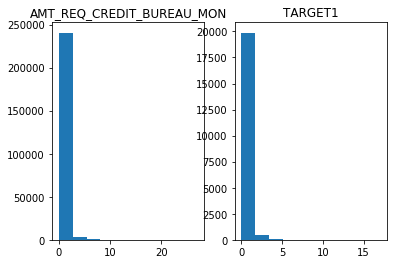

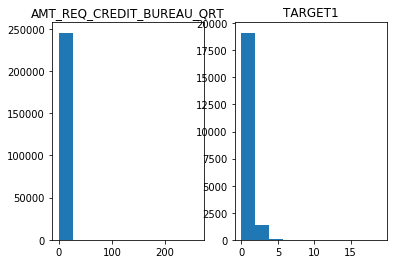

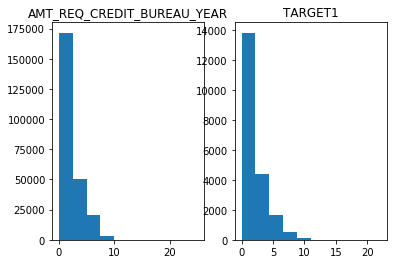

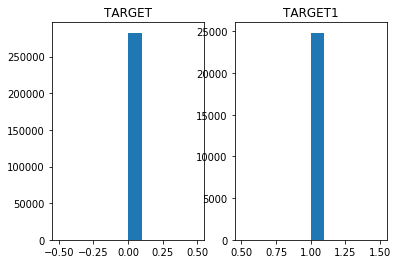

In [22]:
# 欠損値を消さずに分布を見る
for i in range(len(df_fl.columns)):
    fig,ax = plt.subplots(1,2)
    ax[0].hist(df_fl0.iloc[:,i])
    ax[0].set_title(df_fl.columns[i])
    
    ax[1].hist(df_fl1.iloc[:,i])
    ax[1].set_title('TARGET1')
    plt.show()

* 欠損値を削除する・しないで，かなり分布に差がある
* EXT_SOURCE_1，EXT_SOURCE_2，EXT_SOURCE_3はどれも分布がかなり異なるので，重要そうだが，欠損値をどう埋めるか．．．

### int型特徴量の分布

In [23]:
#int型のみのdf
df_in = df[df.columns[df.dtypes == 'int64']]
# ターゲット変数ごとに分ける。
df_in0 = df_in[df_in.TARGET == 0]
df_in1 = df_in[df_in.TARGET == 1]
df_in0.shape,df_in1.shape

((282686, 41), (24825, 41))

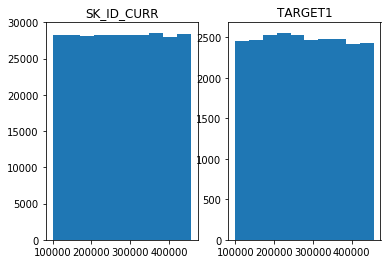

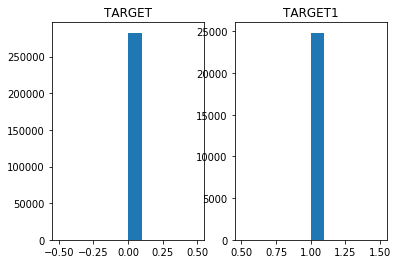

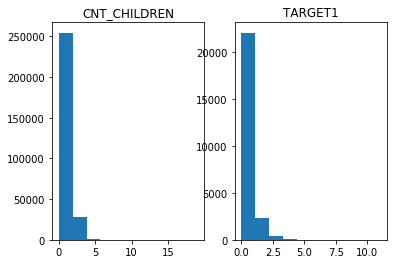

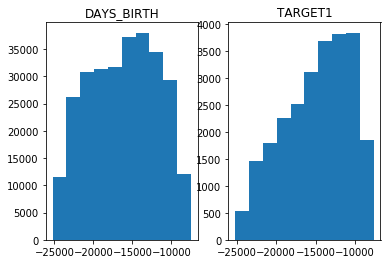

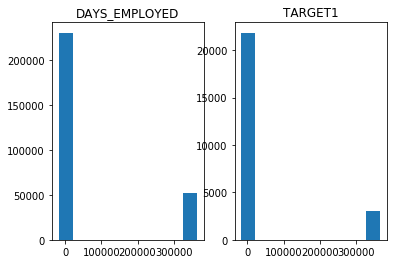

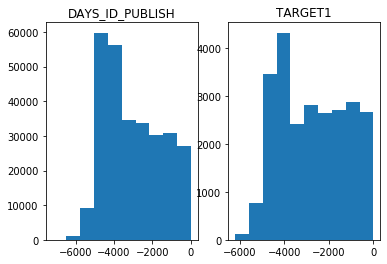

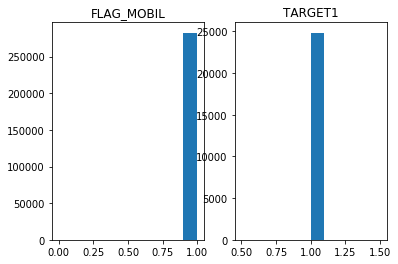

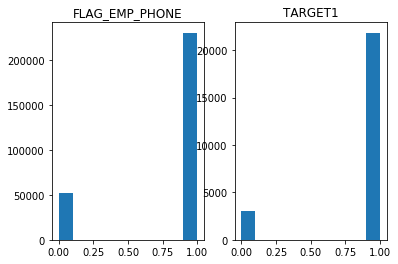

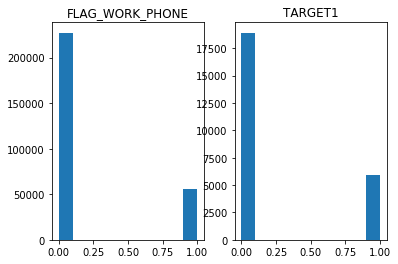

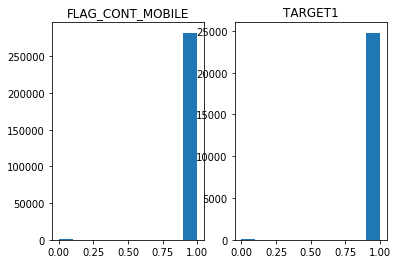

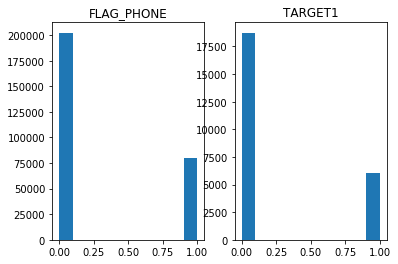

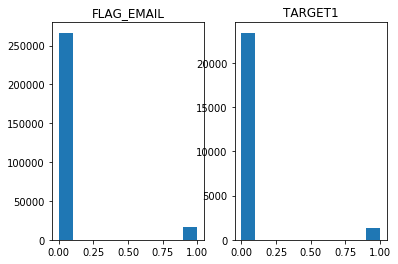

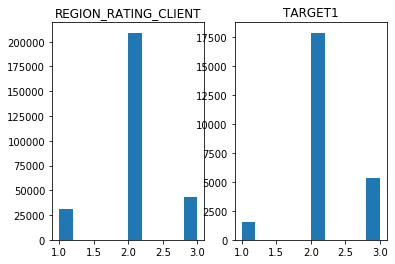

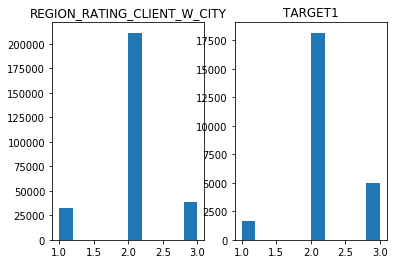

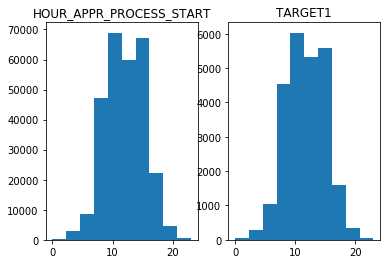

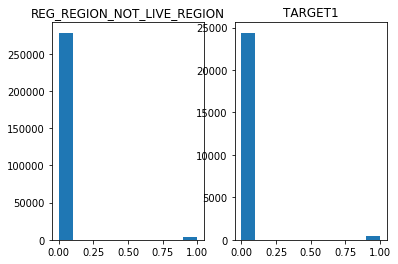

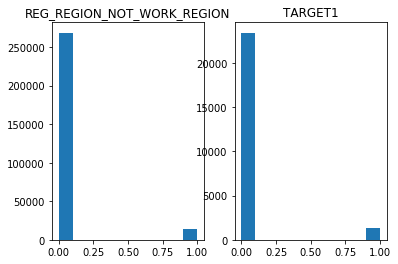

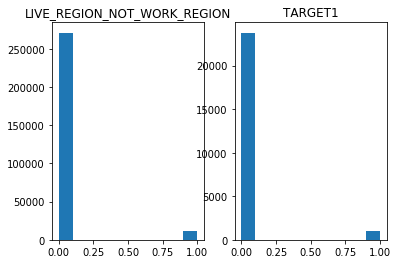

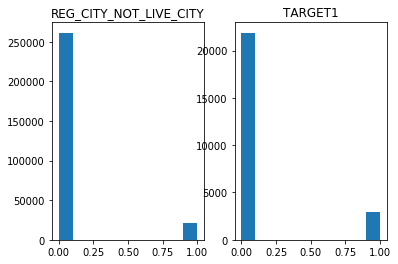

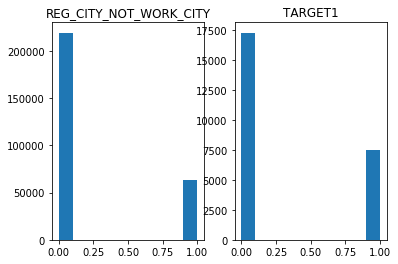

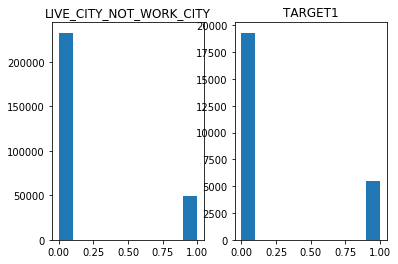

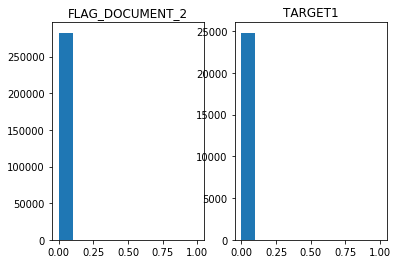

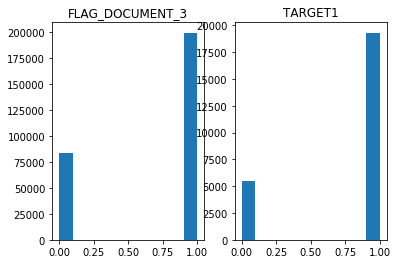

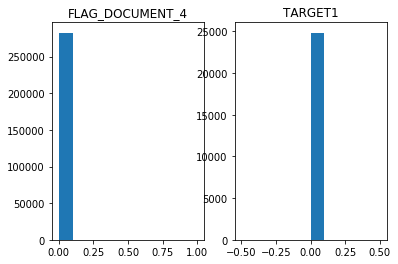

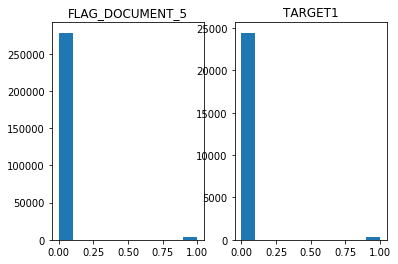

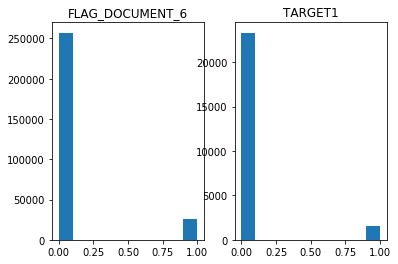

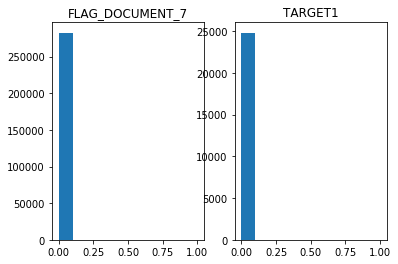

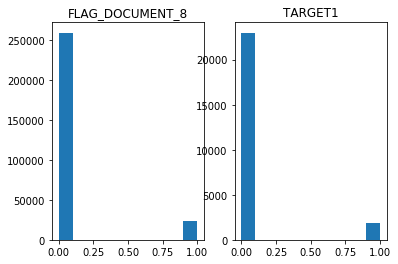

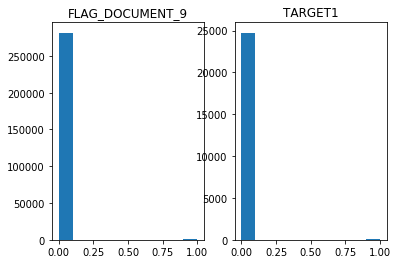

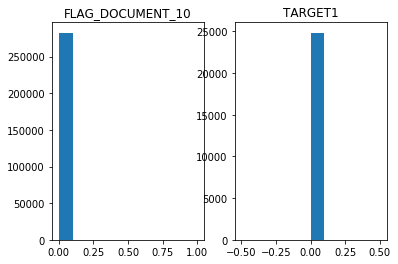

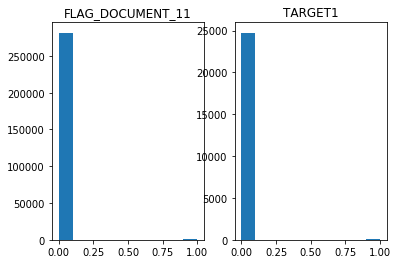

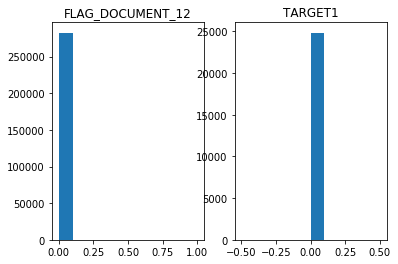

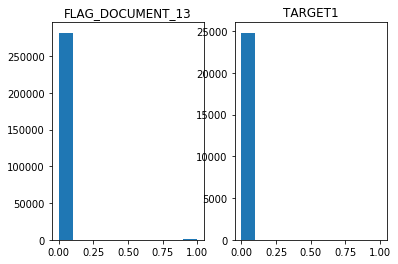

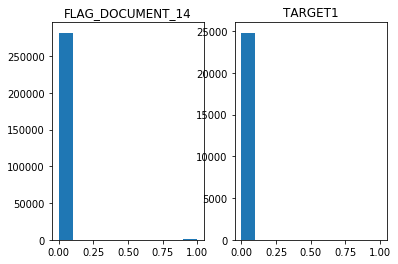

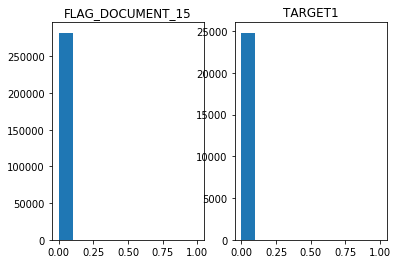

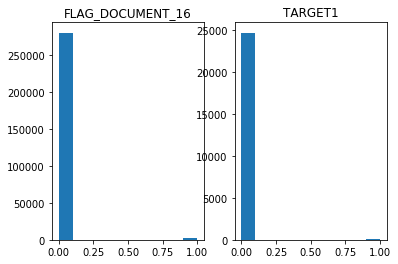

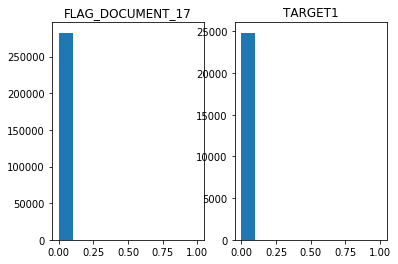

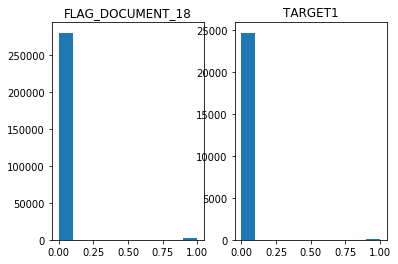

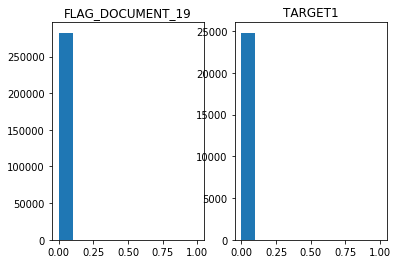

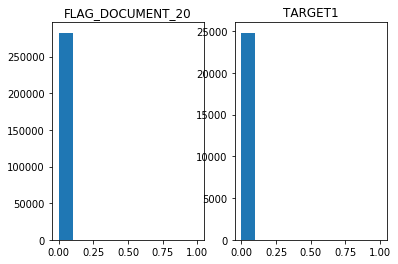

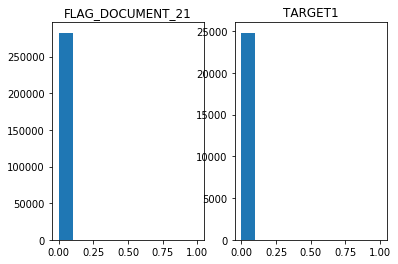

In [24]:
# ターゲット変数別にヒストグラムを出力し，分布の違いを見る
for i in range(len(df_in.columns)):
    fig,ax = plt.subplots(1,2)
    ax[0].hist(df_in0.dropna().iloc[:,i])#欠損値を削除
    ax[0].set_title(df_in.columns[i])
    
    ax[1].hist(df_in1.dropna().iloc[:,i])
    ax[1].set_title('TARGET1')
    plt.show()

int型の変数は，ほとんど2値～3値分類のようだ．

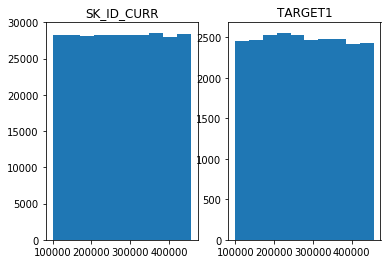

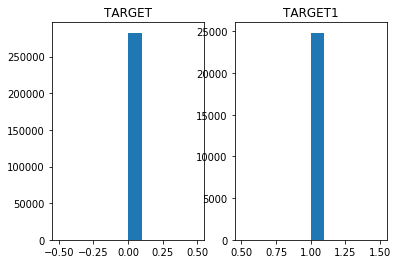

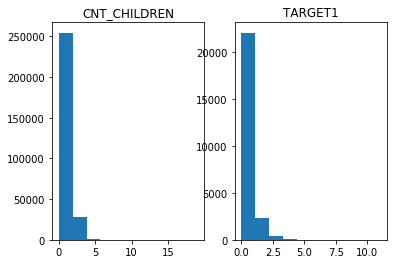

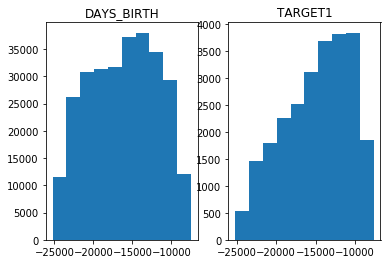

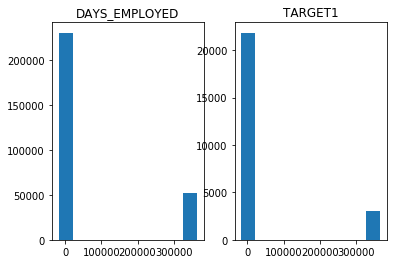

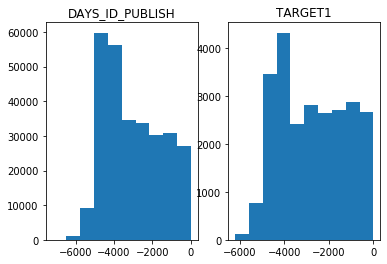

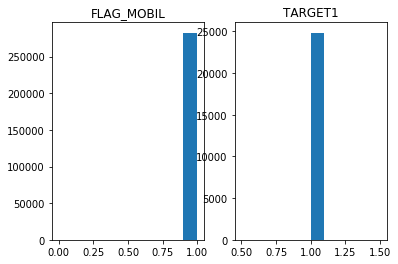

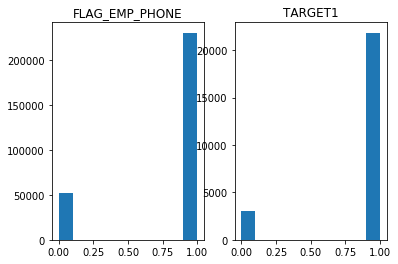

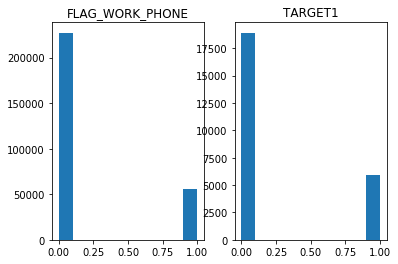

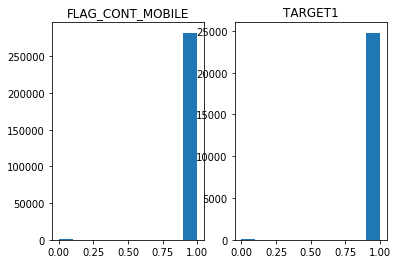

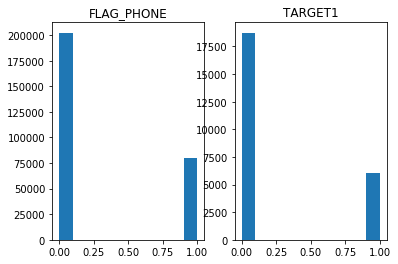

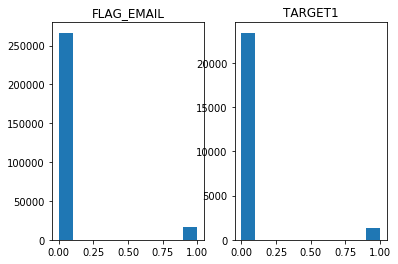

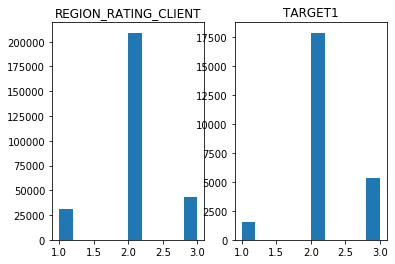

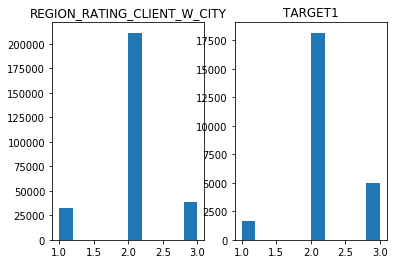

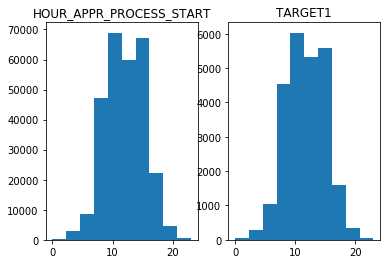

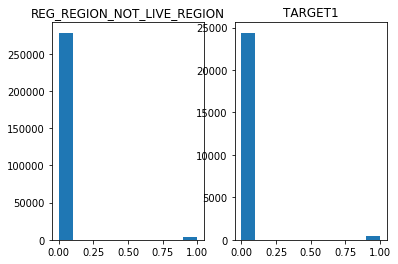

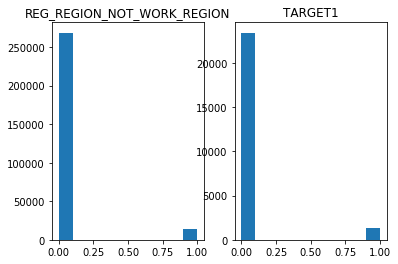

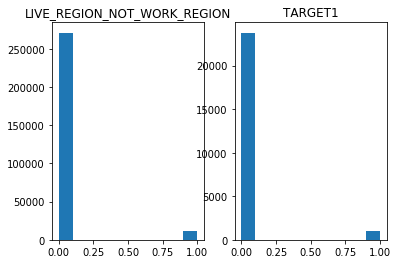

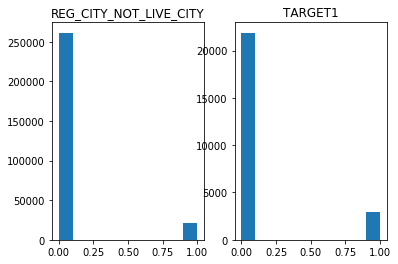

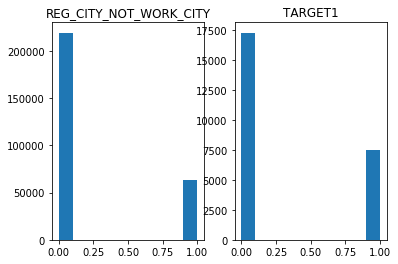

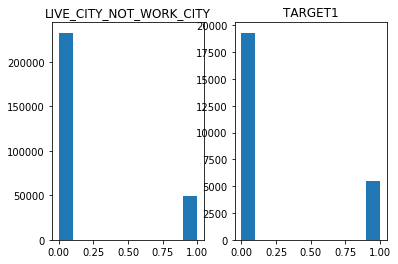

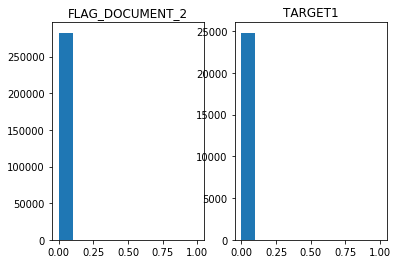

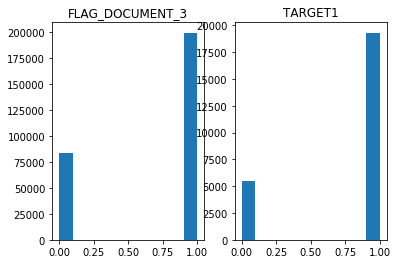

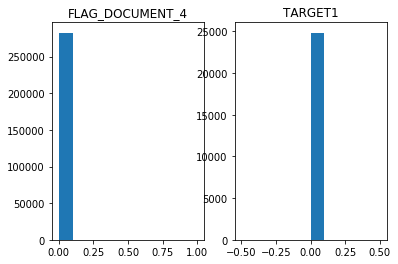

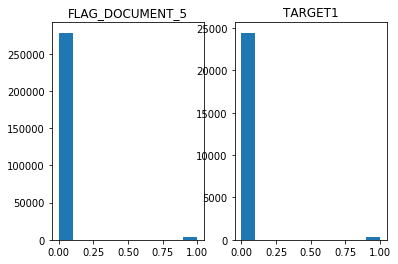

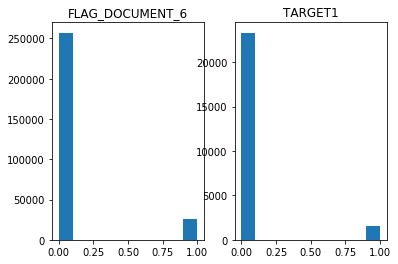

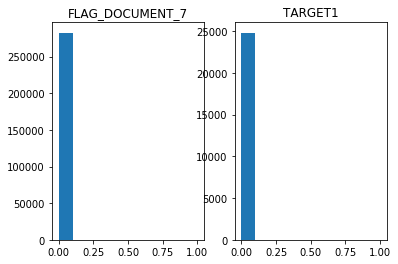

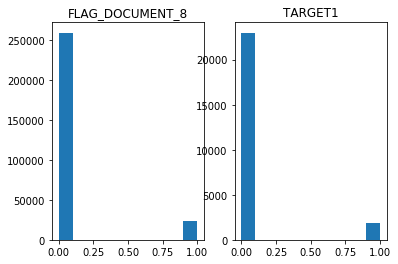

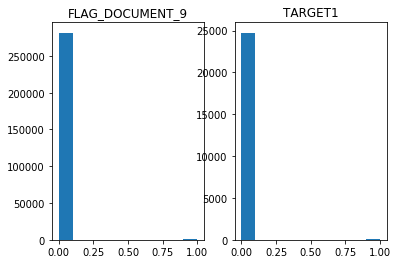

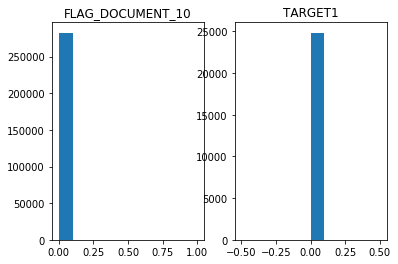

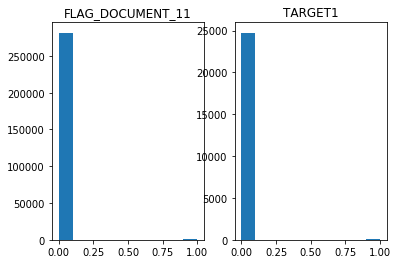

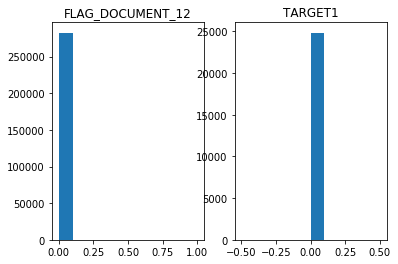

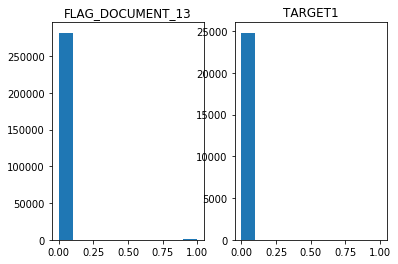

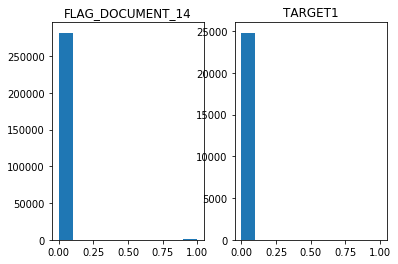

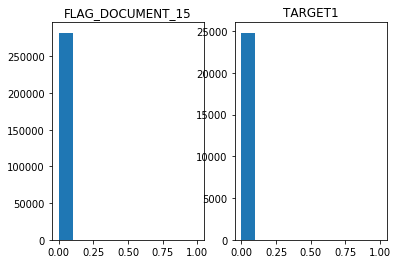

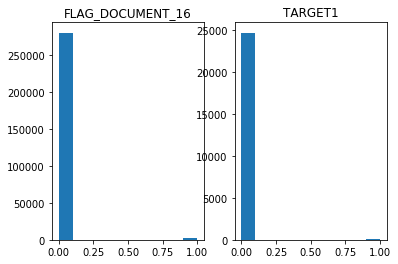

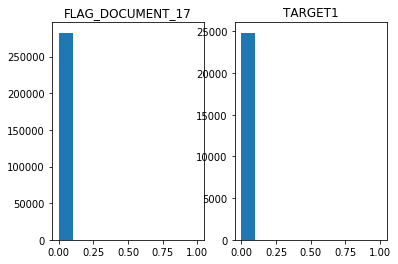

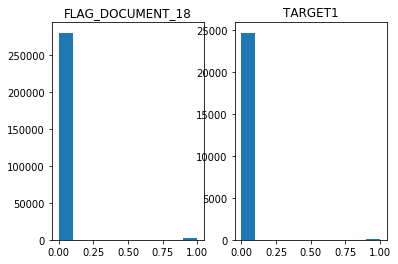

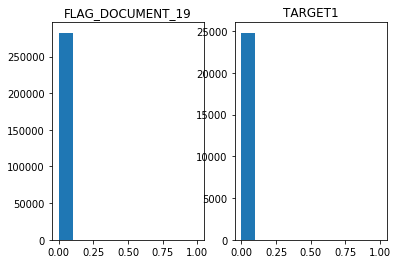

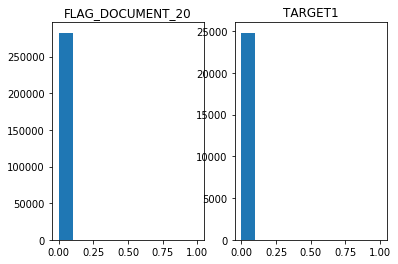

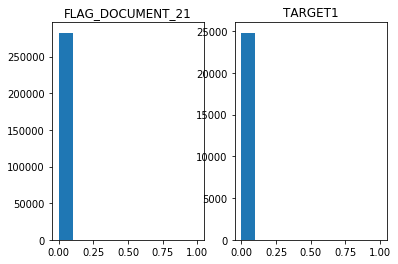

In [25]:
# ターゲット変数別にヒストグラムを出力し，分布の違いを見る
for i in range(len(df_in.columns)):
    fig,ax = plt.subplots(1,2)
    ax[0].hist(df_in0.iloc[:,i])
    ax[0].set_title(df_in.columns[i])
    
    ax[1].hist(df_in1.iloc[:,i])
    ax[1].set_title('TARGET1')
    plt.show()

年齢（DAYS_BIRTH）は重要そう．             
欠損値削除の前と後で，そんなに分布が変わらないので，欠損の多いint型の特徴量は削除してもよさそう．（DAYS_BIRTHは除く）

## 特徴量の重要度
lightGBMで特徴量の重要度（feature_importance）を見てみる

In [26]:
new_df = pd.read_csv('C:/Users/miyas/kaggle/application_train.csv')

In [27]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダーをインスタンス化
le = LabelEncoder()
le_count = 0 
# Iterate through the columns
for col in new_df:
    if new_df[col].dtype == 'object':
        # ユニーク値が２以下のもののみ，ラベルエンコーディング
        if len(list(new_df[col].unique())) <= 2:
            le.fit(new_df[col])
            new_df[col] = le.transform(new_df[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)
print('Features shape: ', new_df.shape)

3 columns were label encoded.
Features shape:  (307511, 122)


In [28]:
# one-hotエンコーディング（１列目は削除）
new_df = pd.get_dummies(new_df,drop_first=True)
print('Features shape: ', new_df.shape)

Features shape:  (307511, 230)


In [29]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
dropcol = ['SK_ID_CURR','TARGET']
X = new_df.drop(dropcol,axis=1)
X_df = new_df.drop(dropcol,axis=1)
y = new_df.TARGET
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [30]:
lgb_train = lgb.Dataset(data=X_train, label=y_train)
lgb_eval = lgb.Dataset(data=X_val, label=y_val)

Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.758104


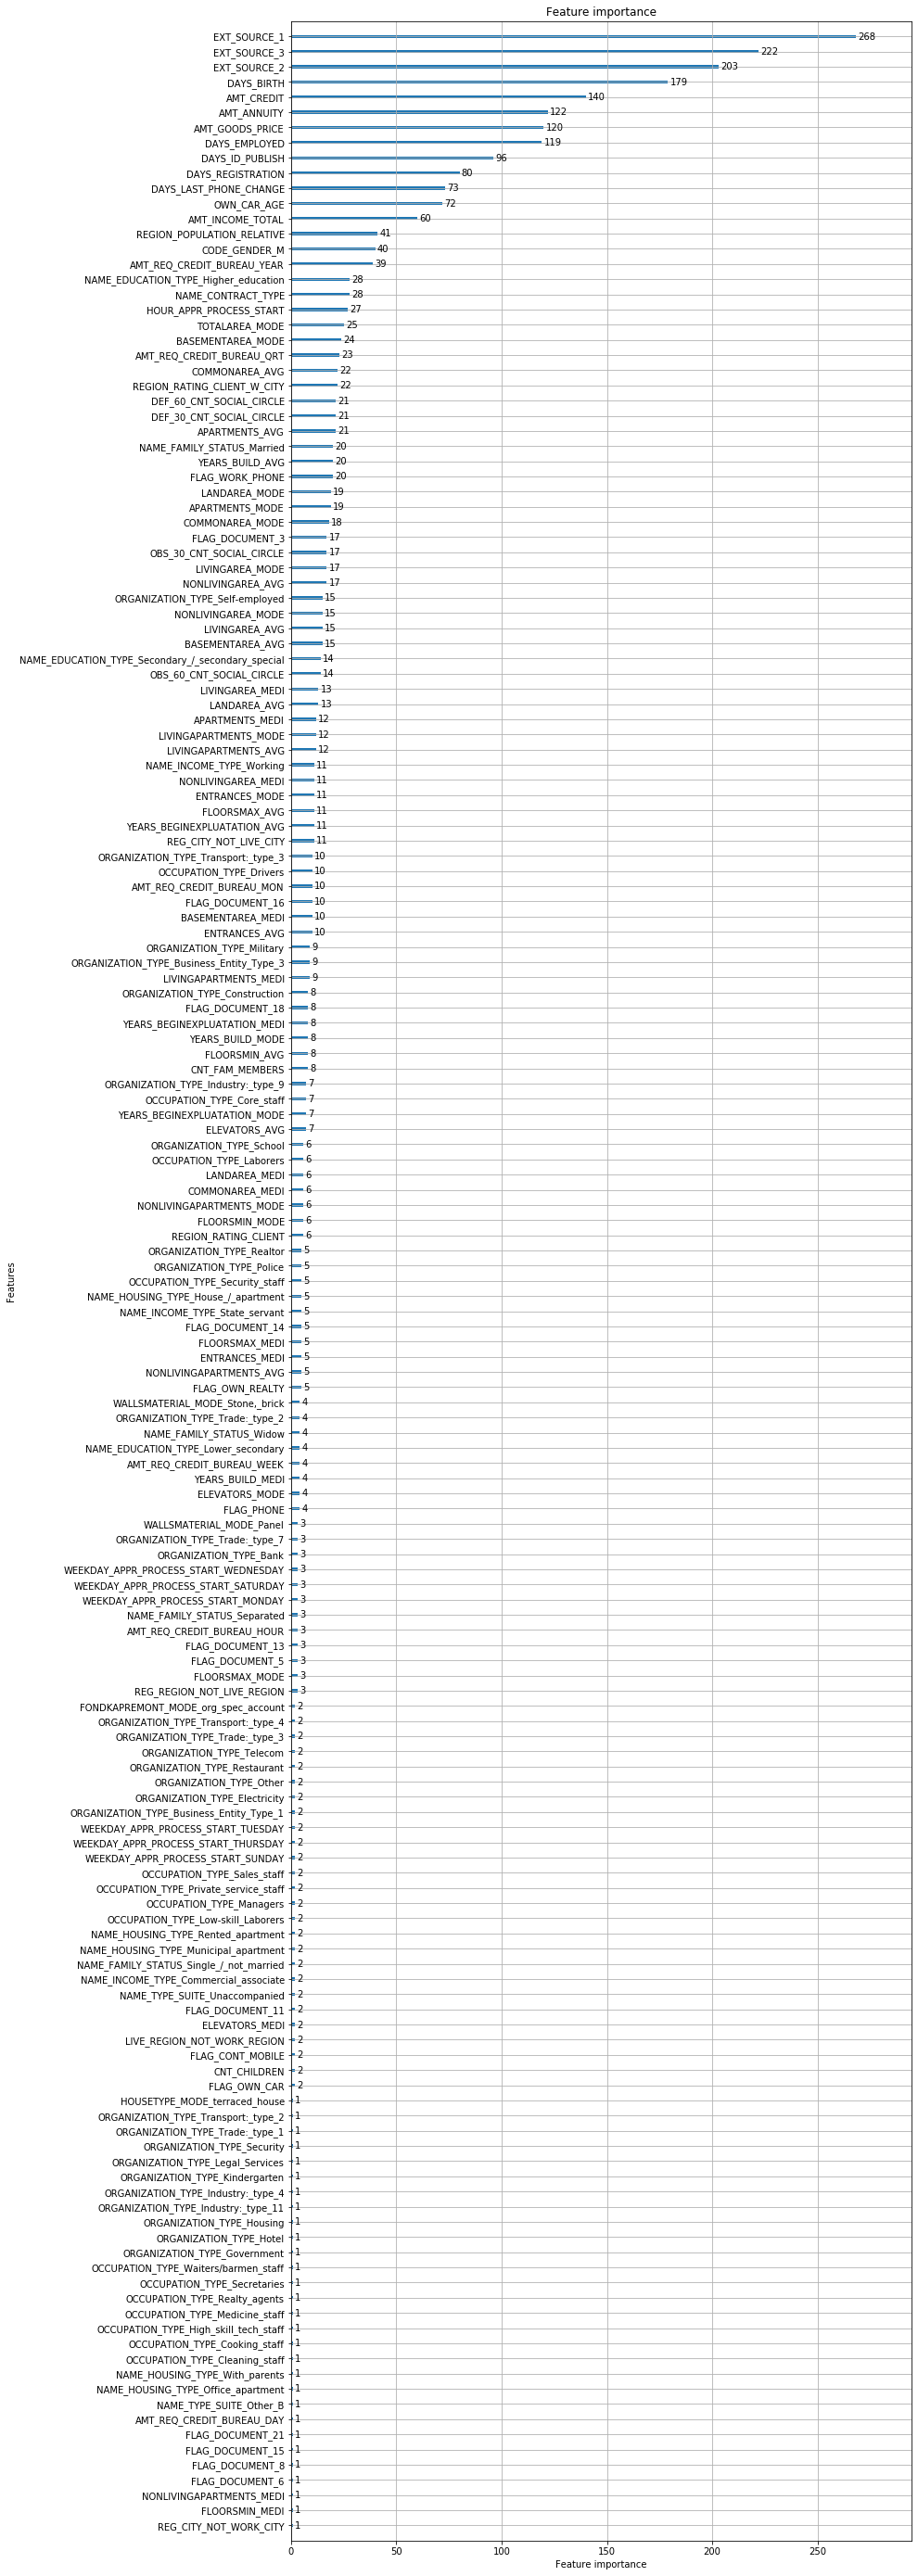

In [31]:
param = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc'}
model = lgb.train(params=param, train_set=lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)
lgb.plot_importance(model, figsize=(12, 50))

In [32]:
#sklearnAPIとfeature_importanceの出し方が違う！！！！
importance = pd.DataFrame(model.feature_importance(), index=X.columns, columns=['importance']).sort_values('importance',ascending=False)
importance.head(15)

,importance
EXT_SOURCE_1,268
EXT_SOURCE_3,222
EXT_SOURCE_2,203
DAYS_BIRTH,179
AMT_CREDIT,140
AMT_ANNUITY,122
AMT_GOODS_PRICE,120
DAYS_EMPLOYED,119
DAYS_ID_PUBLISH,96
DAYS_REGISTRATION,80


分布通り，EXT_SOURやDAYS_BIRTHが重要みたい．重要度が低くて，欠損の多い特徴量は削ってもいいかも．

In [33]:
importance.tail(10)

,importance
NAME_EDUCATION_TYPE_Incomplete higher,0
ORGANIZATION_TYPE_Industry: type 2,0
ORGANIZATION_TYPE_Industry: type 13,0
ORGANIZATION_TYPE_Industry: type 12,0
ORGANIZATION_TYPE_Industry: type 10,0
ORGANIZATION_TYPE_Industry: type 1,0
ORGANIZATION_TYPE_Emergency,0
FLAG_DOCUMENT_9,0
ORGANIZATION_TYPE_Culture,0
EMERGENCYSTATE_MODE_Yes,0


↑この辺の特徴量は欠損割合がそんなに高くない．削除すべきか迷う

#### 間違えて回帰をやってしまったけど，メモのために残しておく（sklearn like）

In [55]:
model = lgb.LGBMRegressor(objective='regression')
result = model.fit(X=X_train,y=y_train,eval_set=[(X_val,y_val)],eval_metric='l2',early_stopping_rounds=100)
y_pred = model.predict(X_val,num_iteration=result.best_iteration_)
importance = pd.DataFrame(model.feature_importances_, index=X_df.columns, columns=['importance'])
display(importance)

[1]	valid_0's l2: 0.0726357	valid_0's l2: 0.0726357
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 0.0719949	valid_0's l2: 0.0719949
[3]	valid_0's l2: 0.0714687	valid_0's l2: 0.0714687
[4]	valid_0's l2: 0.0710271	valid_0's l2: 0.0710271
[5]	valid_0's l2: 0.0706583	valid_0's l2: 0.0706583
[6]	valid_0's l2: 0.0703499	valid_0's l2: 0.0703499
[7]	valid_0's l2: 0.0700963	valid_0's l2: 0.0700963
[8]	valid_0's l2: 0.0698761	valid_0's l2: 0.0698761
[9]	valid_0's l2: 0.0696661	valid_0's l2: 0.0696661
[10]	valid_0's l2: 0.069474	valid_0's l2: 0.069474
[11]	valid_0's l2: 0.0693112	valid_0's l2: 0.0693112
[12]	valid_0's l2: 0.0691615	valid_0's l2: 0.0691615
[13]	valid_0's l2: 0.0690375	valid_0's l2: 0.0690375
[14]	valid_0's l2: 0.06891	valid_0's l2: 0.06891
[15]	valid_0's l2: 0.0688182	valid_0's l2: 0.0688182
[16]	valid_0's l2: 0.0687211	valid_0's l2: 0.0687211
[17]	valid_0's l2: 0.0686186	valid_0's l2: 0.0686186
[18]	valid_0's l2: 0.068544	valid_0's l2: 0.068544


,importance
NAME_CONTRACT_TYPE,15
FLAG_OWN_CAR,3
FLAG_OWN_REALTY,3
CNT_CHILDREN,8
AMT_INCOME_TOTAL,54
...,...
WALLSMATERIAL_MODE_Others,0
WALLSMATERIAL_MODE_Panel,6
"WALLSMATERIAL_MODE_Stone, brick",0
WALLSMATERIAL_MODE_Wooden,0
